Name: Aparna Iyer

PRN: 22070126017

Branch: AI-ML

Batch: 2022-2026, A1

**Experiment 2: Autoencoders**

In [14]:
#Import the necessary libraries
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import os
from torchvision.datasets import ImageFolder
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam


Dataset Selected: CIFAR-10 Dataset

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes. There are 6000 images per class, 50000 training images, and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10,000 images. The test batch contains exactly 1000 randomly-selected images from each class.

In [4]:
# Load dataset
(x_train, _), (x_test, _) = cifar10.load_data()

# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape for ConvNet input (CIFAR-10 images are 32x32x3)
input_shape = (32, 32, 3)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
# Encoder
input_img = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)  # Compressed representation

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)  # Output image

# Build Autoencoder Model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Model Summary
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 16)            │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 3)           │             867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,347 (52.14 KB)

 Trainable params: 13,347 (52.14 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = autoencoder.fit(x_train, x_train,
                          epochs=20,
                          batch_size=128,
                          shuffle=True,
                          validation_data=(x_test, x_test))


Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 137s 342ms/step - loss: 0.0233 - val_loss: 0.0074
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 137s 331ms/step - loss: 0.0070 - val_loss: 0.0062
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 124s 317ms/step - loss: 0.0061 - val_loss: 0.0057
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 149s 336ms/step - loss: 0.0056 - val_loss: 0.0053
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 140s 331ms/step - loss: 0.0053 - val_loss: 0.0050
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 140s 325ms/step - loss: 0.0050 - val_loss: 0.0048
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 123s 316ms/step - loss: 0.0049 - val_loss: 0.0047
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 152s 342ms/step - loss: 0.0047 - val_loss: 0.0045
Epoch 9/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 137s 330ms/step - loss: 0.0046 - val_loss: 0.0044
Epoch 10/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 130s 332ms/step - loss: 0.0045 - val_loss: 0.0043
Epoch 11/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 135s 314ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 12

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


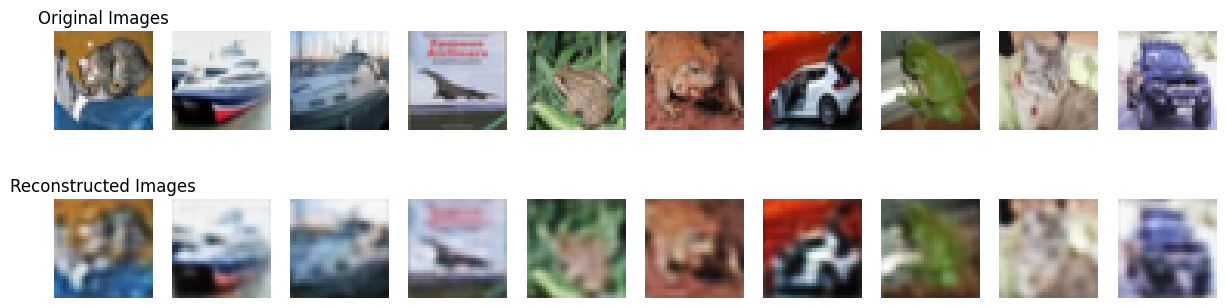

In [11]:
# Reconstruct images
reconstructed_images = autoencoder.predict(x_test[:10])

# Display Original vs. Reconstructed
fig, axes = plt.subplots(2, 10, figsize=(15, 4))
for i in range(10):
    # Original Image
    axes[0, i].imshow(x_test[i])
    axes[0, i].axis('off')

    # Reconstructed Image
    axes[1, i].imshow(reconstructed_images[i])
    axes[1, i].axis('off')

axes[0, 0].set_title("Original Images")
axes[1, 0].set_title("Reconstructed Images")
plt.show()


Modularized Implementation of Autoencoders with Classes and Methods

In [13]:
class Autoencoder:
    def __init__(self, input_shape=(32, 32, 3), learning_rate=0.001):
        self.input_shape = input_shape
        self.learning_rate = learning_rate
        self.model = self._build_model()

    def _encoder(self, input_img):
        # To define the Encoder network
        x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
        x = MaxPooling2D((2, 2), padding='same')(x)
        x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
        x = MaxPooling2D((2, 2), padding='same')(x)  # Bottleneck (compressed representation)
        return x

    def _decoder(self, encoded):
        #To define the Decoder network
        x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
        x = UpSampling2D((2, 2))(x)
        x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
        x = UpSampling2D((2, 2))(x)
        decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)  # Output image
        return decoded

    def _build_model(self):
        #To create the Autoencoder model by combining Encoder & Decoder
        input_img = Input(shape=self.input_shape)
        encoded = self._encoder(input_img)
        decoded = self._decoder(encoded)
        autoencoder = Model(input_img, decoded)
        autoencoder.compile(optimizer=Adam(learning_rate=self.learning_rate), loss='mse')
        return autoencoder

    def train(self, x_train, x_test, epochs=20, batch_size=128):
        #Trains the Autoencoder
        self.model.fit(x_train, x_train,
                       epochs=epochs,
                       batch_size=batch_size,
                       shuffle=True,
                       validation_data=(x_test, x_test))

    def reconstruct_images(self, x_test, num_images=10):
        #Reconstructs images and displays original vs reconstructed images
        reconstructed = self.model.predict(x_test[:num_images])

        fig, axes = plt.subplots(2, num_images, figsize=(15, 4))
        for i in range(num_images):
            # Original Image
            axes[0, i].imshow(x_test[i])
            axes[0, i].axis('off')

            # Reconstructed Image
            axes[1, i].imshow(reconstructed[i])
            axes[1, i].axis('off')

        axes[0, 0].set_title("Original Images")
        axes[1, 0].set_title("Reconstructed Images")
        plt.show()

In [12]:
# Create an instance of the Autoencoder
autoencoder = Autoencoder()

# Train the model
autoencoder.train(x_train, x_test, epochs=20, batch_size=128)


Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 126s 317ms/step - loss: 0.0229 - val_loss: 0.0081
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 121s 311ms/step - loss: 0.0076 - val_loss: 0.0064
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 149s 329ms/step - loss: 0.0062 - val_loss: 0.0058
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 123s 314ms/step - loss: 0.0057 - val_loss: 0.0055
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 145s 323ms/step - loss: 0.0053 - val_loss: 0.0055
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 142s 323ms/step - loss: 0.0051 - val_loss: 0.0048
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 139s 314ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 125s 321ms/step - loss: 0.0047 - val_loss: 0.0053
Epoch 9/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 139s 313ms/step - loss: 0.0046 - val_loss: 0.0045
Epoch 10/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 148s 328ms/step - loss: 0.0045 - val_loss: 0.0043
Epoch 11/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 136s 313ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 12

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


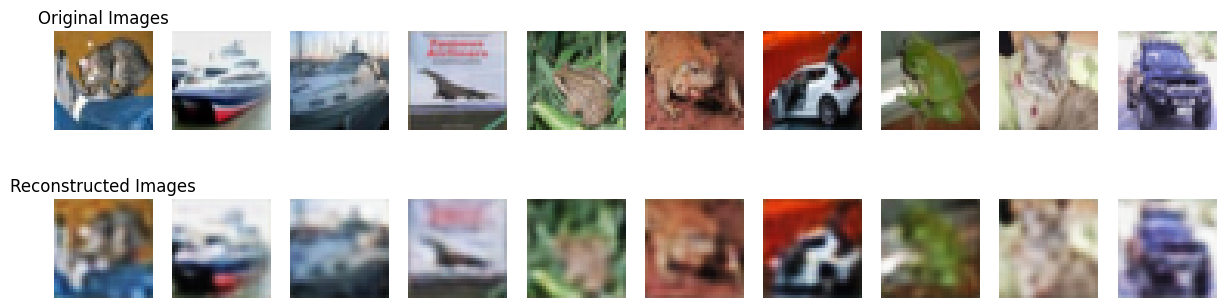

In [15]:
# Reconstruct images and compare
autoencoder.reconstruct_images(x_test, num_images=10)
